<a href="https://colab.research.google.com/github/CarlosLeandro09/DataAnalysisRadiology/blob/main/MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principles of MRI
https://larsonlab.github.io/MRI-education-resources/Introduction.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Spin Physics

In [ ]:
# Equilibrium Magnetization

N_r = 1. #Spin density (???)
h = 6.63e-34 #Planck constant
y_ = 42.58e6 #Gyromagnetic ratio
B_0 = 1.5 #Magnetic field
I_z = 1/2 #Spin number
k = 1.38e-23 #Boltzmann’s constant
T = 310. #Human body temperature ~310k


M0_r = (N_r * ((h) ** 2)*((y_) ** 2) * I_z * (I_z + 1) * B_0)/(3 * k * T)
M0_r

6.986004459077838e-32

In [ ]:
# Fractional Polarization

P = h * y_ * B_0 / (2*k*T)
P

4.949253155680225e-06

In [ ]:
# Resonance Frequency

f = y_ * B_0
f

63870000.0

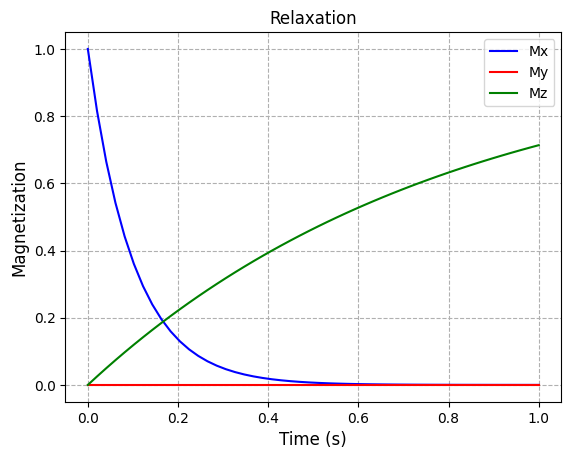

<Figure size 1000x1500 with 0 Axes>

In [ ]:
# Relaxation Equations

t = np.linspace(0,1) #s

T1 = .8 #s
T2 = .1 #s
M0 = 1 #s

M_start = np.array([[M0], [0], [0]]) #Start along MX
M_all = np.zeros((3,len(t))) #Magnetization

def bloch_relax(M_start, T, M0, T1, T2):
  B_1 = np.array([[np.exp(-T/T2), 0, 0],
                    [0, np.exp(-T/T2), 0],
                    [0, 0, np.exp(-T/T1)]])
  B_3 = np.array([[0], [0], [M0*(1-np.exp(-T/T1))]])

  M_end = np.dot(B_1, M_start) + B_3
  return M_end

for i in range(len(t)):
  M_all[:, [i]] = bloch_relax(M_start, t[i], M0, T1, T2)


plt.plot(t, M_all[0, :], linestyle='-', color = 'blue', markersize = 1, label='Mx')
plt.plot(t, M_all[ 1, :], linestyle='-', color = 'red', markersize = 1, label='My')
plt.plot(t,  M_all[2, :], linestyle='-', color = 'green', markersize = 1, label='Mz')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)

plt.title('Relaxation')
plt.legend()

plt.grid(linestyle='--')

plt.figure(figsize=(10, 15))

plt.show()

# Bloch Equation

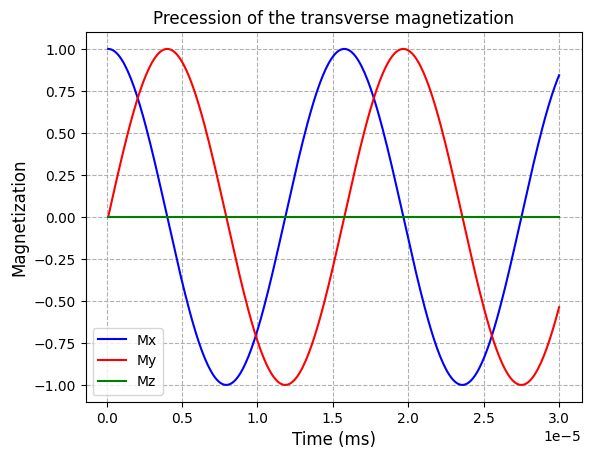

<Figure size 1000x1500 with 0 Axes>

In [ ]:
B0 = 1.5e3 #mT
y_ = 42.58 #kHz/mT

Mstart = [[0],[0],[1]] #start at equilibrium
Mstart = [[1],[0],[0]] #after RF excitation


Bstatic = [0,0,B0]

dt = .1e-6 #ms
N = 300
t = np.arange(1,N+1)*dt
M_all = np.zeros((3,len(t)))
M_all[:,[0]] = Mstart

def bloch_rotate(Mstart, T, B):

  flip = 2 * np.pi * y_ * np.linalg.norm(B) * T

  eta = np.arccos(B[2] / (np.linalg.norm(B) + np.finfo(float).eps))

  theta = np.arctan2(B[1], B[0])

  Rz = lambda x: np.array([[np.cos(x), -np.sin(x), 0], [np.sin(x), np.cos(x), 0], [0, 0, 1]])
  Ry = lambda x: np.array([[np.cos(x), 0, np.sin(x)], [0, 1, 0], [-np.sin(x), 0, np.cos(x)]])

  M_end = np.dot(Rz(-theta), np.dot(Ry(-eta), np.dot(Rz(flip), np.dot(Ry(eta), np.dot(Rz(theta), Mstart)))))
  return M_end

for i in range(0,N-1):
  M_all[:, [i+1]] = bloch_rotate(M_all[:, [i]],dt,Bstatic)

plt.plot(t, M_all[0, :], linestyle='-', color = 'blue', markersize = 1, label='Mx')
plt.plot(t, M_all[ 1, :], linestyle='-', color = 'red', markersize = 1, label='My')
plt.plot(t,  M_all[2, :], linestyle='-', color = 'green', markersize = 1, label='Mz')

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)

plt.title('Precession of the transverse magnetization')
plt.legend()

plt.grid(linestyle='--')

plt.figure(figsize=(10, 15))

plt.show()

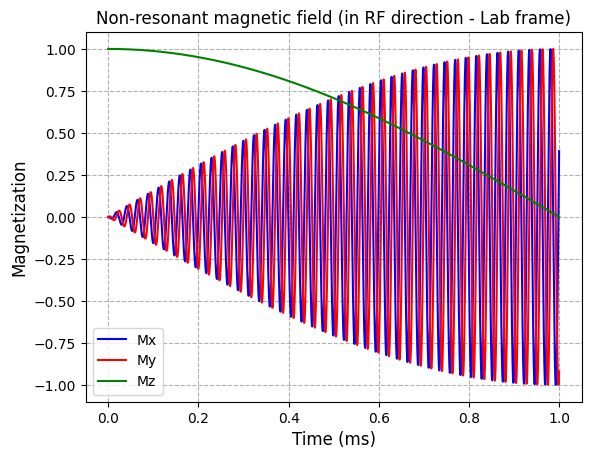

<Figure size 1000x1500 with 0 Axes>

In [ ]:
y_ = 42.58 #kHz/mT

B0 = 1 #mT
f0 = y_*B0 #kHz

M0 = 1
M_equilibrium = [[0],[0],[M0]]

T_RF =  1 #ms
t = np.arange(0, T_RF, T_RF/4000)

RF_flip_angle = math.pi/2 #radians
B10 = RF_flip_angle / (2*math.pi*y_*T_RF) #mT

B = np.vstack((B10*np.cos(2*np.pi*f0*t), -B10*np.sin(2*np.pi*f0*t), B0*np.ones_like(t)))
M_all = np.zeros((3,len(t)))
M_all[:,[0]] = M_equilibrium

for It in range(len(t)-1):
  M_all[:, It+1] = bloch_rotate(M_all[:, It], t[It+1] - t[It], B[:,It])

plt.plot(t, M_all[0, :], linestyle='-', color = 'blue', markersize = 1, label='Mx')
plt.plot(t, M_all[ 1, :], linestyle='-', color = 'red', markersize = 1, label='My')
plt.plot(t,  M_all[2, :], linestyle='-', color = 'green', markersize = 1, label='Mz')

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)

plt.title('Non-resonant magnetic field (in RF direction - Lab frame)')
plt.legend()

plt.grid(linestyle='--')

plt.figure(figsize=(10, 15))

plt.show()

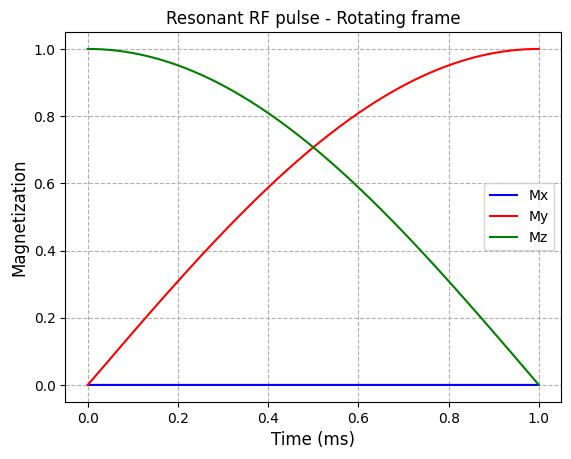

<Figure size 1000x1500 with 0 Axes>

In [ ]:
B = [B10,0,0]
M_all = np.zeros((3,len(t)))
M_all[:,[0]] = M_equilibrium

for It in range(len(t)-1):
  M_all[:, It+1] = bloch_rotate(M_all[:, It], t[It+1] - t[It], B)

plt.plot(t, M_all[0, :], linestyle='-', color = 'blue', markersize = 1, label='Mx')
plt.plot(t, M_all[ 1, :], linestyle='-', color = 'red', markersize = 1, label='My')
plt.plot(t,  M_all[2, :], linestyle='-', color = 'green', markersize = 1, label='Mz')

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)

plt.title('Resonant RF pulse - Rotating frame')
plt.legend()

plt.grid(linestyle='--')

plt.figure(figsize=(10, 15))

plt.show()

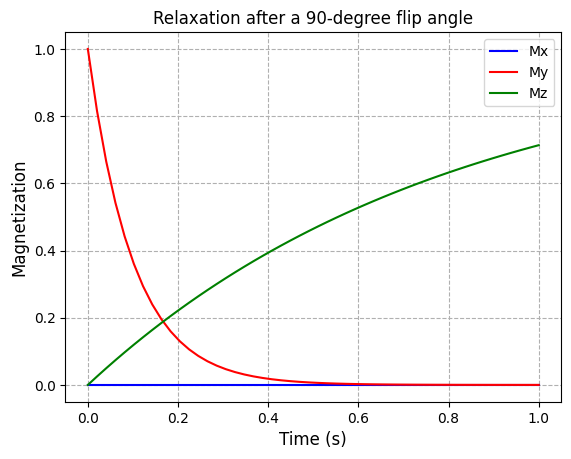

<Figure size 1000x1500 with 0 Axes>

In [ ]:
def bloch_rftip(Mstart, T, B1):
    B = [B1.real, B1.imag, 0]
    M_end = bloch_rotate(Mstart, T, B)
    return M_end

t = np.linspace(0,1) #s
T1 = .8 #s
T2 = .1 #s
M0 = 1 #s
flip = 90
y_ = 42.58 #kHz/mT
T = 1 #ms pulse duration
M_equilibrium = [[0],[0],[M0]]

B10 = (flip * math.pi /180)/(2 * math.pi * y_ *T)
M_start = bloch_rftip(M_equilibrium, T, B10)

M_all = np.zeros((3,len(t)))
for i in range(len(t)):
  M_all[:, [i]] = bloch_relax(M_start, t[i], M0, T1, T2)

plt.plot(t, M_all[0, :], linestyle='-', color = 'blue', markersize = 1, label='Mx')
plt.plot(t, M_all[ 1, :], linestyle='-', color = 'red', markersize = 1, label='My')
plt.plot(t,  M_all[2, :], linestyle='-', color = 'green', markersize = 1, label='Mz')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)

plt.title('Relaxation after a {}-degree flip angle'.format(flip))
plt.legend()

plt.grid(linestyle='--')

plt.figure(figsize=(10, 15))

plt.show()

# MRI Contrast

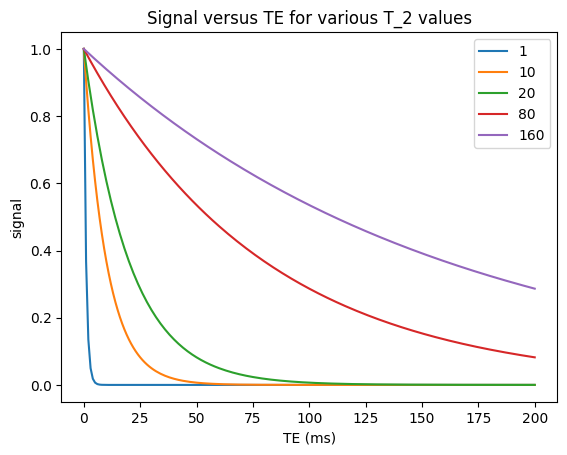

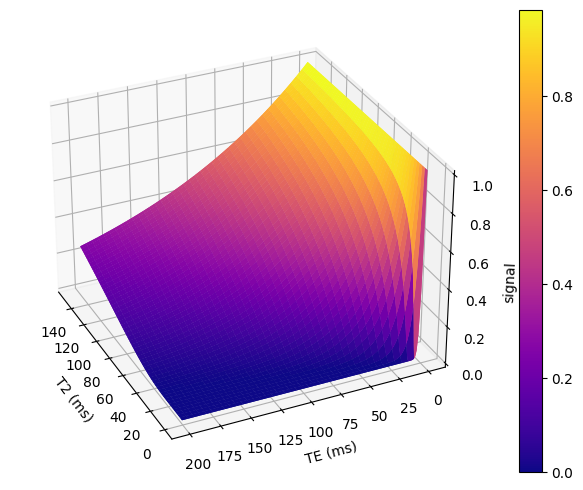

In [ ]:
TE = np.linspace(0, 200, num=201)  # ms
T2v = np.array([1, 10, 20, 80, 160])
T2, TE = np.meshgrid(T2v, TE)
M0 = np.ones_like(T2)

S_TE = M0 * np.exp(-TE / T2)

plt.plot(TE[:,0], S_TE)
plt.xlabel('TE (ms)')
plt.ylabel('signal')
plt.legend(T2v.astype(str))
plt.title('Signal versus TE for various T_2 values')

TE = np.linspace(0, 200, num=201)  # ms
T2 = np.linspace(1, 150, num=150)  # ms
T2, TE = np.meshgrid(T2, TE)
M0 = np.ones_like(T2)

S_TE = M0 * np.exp(-TE / T2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T2, TE, S_TE, cmap='plasma')
ax.view_init(elev=30, azim=155)
ax.set_xlabel('T2 (ms)')
ax.set_ylabel('TE (ms)')
ax.set_zlabel('signal')
fig.colorbar(ax.plot_surface(T2, TE, S_TE, cmap='plasma'))

In [ ]:
M0 = np.array([[1], [1], [1], [1]])
T1 = np.array([[400], [800], [1200], [2000]]) # np.linspace(200, 2000, num=10)[:, None]
NTR = 8
flip = 90
TR = 500 # ms
Nt_per_TR = 100
t_per_TR = np.linspace(0, TR, num=Nt_per_TR, endpoint=False)
t_minus = np.arange(0, NTR+1) * TR
t_plus = t_minus + 1

# magnetization before each RF pulse
Mz_minus = np.zeros((len(T1), NTR+1))
# magnetization after each RF pulse
Mz_plus = np.zeros((len(T1), NTR+1))

# initial condition
Mz_minus[:, 0] = M0[:, 0]
Mz_plus[:, 0] = Mz_minus[:, 0] * np.cos(flip * np.pi/180)
t = np.array([0, np.finfo(float).eps])
Mz_all = np.hstack([Mz_minus[:, 0], Mz_plus[:, 0]])

for I in range(NTR):
    t = np.hstack([t, t_per_TR + (I * TR)])

    for It in range(Nt_per_TR):
        Mz_all = np.hstack([
            Mz_all,
            Mz_plus[:, I] * np.exp(-t_per_TR[It]/T1) + M0 * (1 - np.exp(-t_per_TR[It]/T1))
        ])

    Mz_minus[:, I+1] = Mz_plus[:, I] * np.exp(-TR/T1) + M0 * (1 - np.exp(-TR/T1))
    Mz_plus[:, I+1] = Mz_minus[:, I+1] * np.cos(flip * np.pi/180)

plt.plot(t, Mz_all, t_minus, Mz_minus, 'x', t_plus, Mz_plus,'o')
plt.legend(list(map(str, T1)))
plt.xlabel('time (ms)')
plt.ylabel('M_Z')
plt.title(f'{flip}-degree RF pulses applied every {TR} ms')

ValueError: ignored

In [ ]:
M0 = np.array([[1], [1], [1], [1]])
T1 = np.array([[400], [800], [1200], [2000]])
NTR = 8
flip = 90
TR = 500 # ms
n_dt_per_TR = 100
dt_per_TR = np.linspace(TR/n_dt_per_TR, TR + TR/n_dt_per_TR, num=n_dt_per_TR, endpoint=False)
t_minus_each_TR = np.arange(0, NTR+1) * TR
t_plus_each_TR = t_minus + 1

Mz_minus = np.zeros((len(T1), NTR+1))
Mz_plus = np.zeros((len(T1), NTR+1))

Mz_minus[:, 0] = M0[:, 0]
Mz_plus[:, 0] = Mz_minus[:, 0] * np.cos(flip * math.pi/180)




In [ ]:
Mz_minus = np.zeros((len(T1), NTR+1))
Mz_plus = np.zeros((len(T1), NTR+1))

In [ ]:
Mz_plus

In [ ]:
Mz_plus

# Bloch Equation Simulation
http://mrsrl.stanford.edu/~brian/bloch/

In [ ]:
# Rotations: Precession and Excitation



def zrot(phi):
  Rz = [[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]]
  return Rz

def yrot(phi):
  Ry = [[np.cos(phi), 0, np.sin(phi)],[0, 1, 0],[-np.sin(phi), 0, np.cos(phi)]]
  return Ry

def xrot(phi):
  Rx = [[1, 0, 0], [0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]]
  return Rx

def throt(phi,theta):
  Rz = zrot(-theta)
  Rx = xrot(phi)
  Rth = np.linalg.inv(Rz) @ Rx @ Rz
  return Rth
throt((math.pi/4),(math.pi/6))

array([[ 0.9267767 ,  0.12682648,  0.35355339],
       [ 0.12682648,  0.78033009, -0.61237244],
       [-0.35355339,  0.61237244,  0.70710678]])

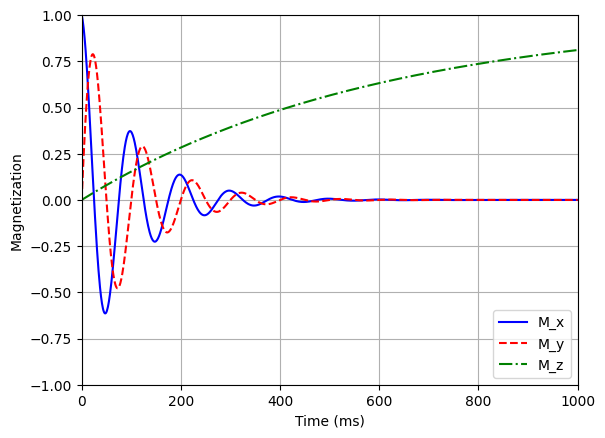

In [ ]:
#Free Precession



def freeprecess(T,T1,T2,df):
  phi = (2 * math.pi * df * T) / 1000	# Resonant precession, radians.
  E1 = np.exp(-T/T1)
  E2 = np.exp(-T/T2)

  Afp = np.array([[E2, 0, 0], [0, E2, 0], [0, 0, E1]]) @ zrot(phi)
  Bfp = np.array([[0], [0], [1-E1]])
  return Afp, Bfp

dT = 1		# 1ms delta-time.
T = 1000	# total duration
N = int(np.ceil(T/dT)+1) # number of time steps.
df = 10	  # Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.

A,B = freeprecess(dT,T1,T2,df)

M = np.zeros((3,N))	 # Keep track of magnetization at all time points.
M[:,[0]]=[[1],[0],[0]] # Starting magnetization

for k in range(1,N):
  M[:,[k]] = A @ M[:,[k-1]] + B

time = np.arange(0,N)*dT
plt.plot(time, M[0], 'b-', time, M[1], 'r--', time, M[2], 'g-.')
plt.legend(['M_x', 'M_y', 'M_z'])
plt.xlabel('Time (ms)')
plt.ylabel('Magnetization')
plt.axis([min(time), max(time), -1, 1])
plt.grid(True)
plt.show()

In [ ]:
#Saturation-Recovery



df = 0		# Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.
TE = 1		# ms.
TR = 500		# ms.
flip = math.pi/3	# radians.

M =[[0],[0],[1]] # Starting magnetization
Rflip = yrot(flip)

#Ate,Bte = freeprecess(TE,T1,T2,df)
#M = np.array(Rflip) @ np.array(M)	# Magnetization after tip.
#M = Ate @ M + Bte	# Magnetization at 1º TE.
#print(M)

Atr,Btr = freeprecess(TR,T1,T2,df)
M = np.array(Rflip) @ np.array(M)	# Magnetization after tip.
M = Atr @ M + Btr	# Magnetization at TR.
print(M)

M = np.array(Rflip) @ np.array(M)	# Magnetization after tip.
Ate,Bte = freeprecess(TE,T1,T2,df)
M = Ate @ M + Bte	# Magnetization at 2º TE.
print(M)


#Para cada consulta de magnetização utilize uma variável nova, porque no cálculo, se você utilizar o mesmo M, ocorrerá a adição de um T a mais

[[0.00583523]
 [0.        ]
 [0.7827009 ]]
[[0.67398284]
 [0.        ]
 [0.38731897]]


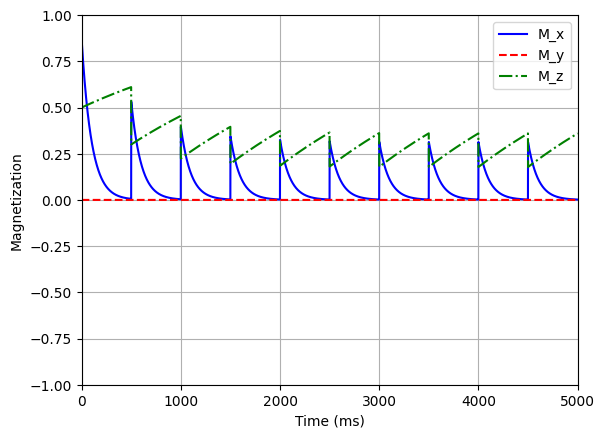

In [ ]:
df = 0		# Hz off-resonance.
T1 = 2000	# ms.
T2 = 100	# ms.
TE = 1		# ms.
dT = 1		# ms.
TR = 500		# ms.
flip = math.pi/3	# radians.
Ntr = round(TR/dT)
Nex = 10
N = Ntr*Nex+1 # number of time steps.

M = np.zeros((3,N))	 # Keep track of magnetization at all time points.
M[:,[0]] =[[0],[0],[1]] # Starting magnetization
Rflip = yrot(flip)

A1,B1 = freeprecess(dT,T1,T2,df)

aux = 0
for i in range(0,Nex):
  M[:,[aux]] = Rflip @ M[:,[aux]]
  for j in range(0,Ntr):
    aux += 1
    M[:,[aux]] = A1 @ M[:,[aux-1]] + B1

time = np.arange(0,N)*dT
plt.plot(time, M[0], 'b-', time, M[1], 'r--', time, M[2], 'g-.')
plt.legend(['M_x', 'M_y', 'M_z'])
plt.xlabel('Time (ms)')
plt.ylabel('Magnetization')
plt.axis([min(time), max(time), -1, 1])
plt.grid(True)
plt.show()

In [ ]:
df = 0		# Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.
TE = 1		# ms.
TR = 500		# ms.
flip = math.pi/3	# radians.

M =[[0],[0],[1]] # Starting magnetization

Rflip = yrot(flip)
Atr,Btr = freeprecess(TR,T1,T2,df)

M = np.linalg.inv(np.eye(3) - Atr @ Rflip) @ Btr
M

array([[0.00421759],
       [0.        ],
       [0.72034465]])

In [ ]:
def sssignal(flip,T1,T2,TE,TR,dfreq):
  Rflip = yrot(flip)
  Atr,Btr = freeprecess(TR-TE,T1,T2,dfreq)
  Ate,Bte = freeprecess(TE,T1,T2,dfreq)

  Mss = np.linalg.inv(np.eye(3)-Ate @ Rflip @ Atr) @ (Ate @ Rflip @ Btr+Bte)
  Msig = Mss[1] + 1j @ Mss[2]

  return Msig,Mss

df = 0		# Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.
TE = 1		# ms.
TR = 500		# ms.
flip = math.pi/3	# radians.

M =[[0],[0],[1]] # Starting magnetization
Rflip = yrot(flip)

Ate,Bte = freeprecess(TE,T1,T2,df)
Atr,Btr = freeprecess(TR,T1,T2,df)
Atetr,Btetr = freeprecess(TR-TE,T1,T2,df)

Mte2 = np.linalg.inv(np.eye(3)-Ate @ Rflip @ Atr) @ (Ate @ Rflip @ Btr+Bte)

Mte2


array([[0.620224  ],
       [0.        ],
       [0.35793079]])

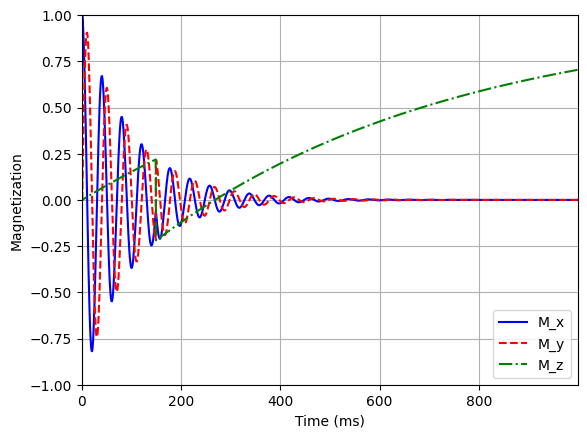

In [ ]:
# Spin-Echo Sequences



df = 25		# Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.
TE = 300		# ms.
TR = 1000	# ms.
flip_90 = math.pi/2	# radians.
flip_180 = math.pi	# radians.
dT = 1    # ms.
N1 = round(TE/2/dT)
N2 = round((TR-TE/2)/dT)

Rflip_90 = yrot(flip_90)
Rflip_180 = xrot(flip_180)
M = np.zeros((3,N1+N2))	 # Keep track of magnetization at all time points.
M[:, [0]] =[[0],[0],[1]] # Starting magnetization

A,B = freeprecess(dT,T1,T2,df)

M[:, [1]] = np.array(Rflip_90) @ np.array(M[:, [0]])
for i in range(2,N1):
  M[:,[i]] = A @ M[:,[i-1]] + B
M[:, [N1]] = np.array(Rflip_180) @ np.array(M[:, [N1-1]])
for j in range(1,N2):
  M[:,[j+N1]] = A @ M[:,[j+N1-1]] + B

time = np.arange(0,N1+N2)*dT
plt.plot(time, M[0], 'b-', time, M[1], 'r--', time, M[2], 'g-.')
plt.legend(['M_x', 'M_y', 'M_z'])
plt.xlabel('Time (ms)')
plt.ylabel('Magnetization')
plt.axis([min(time), max(time), -1, 1])
plt.grid(True)
plt.show()

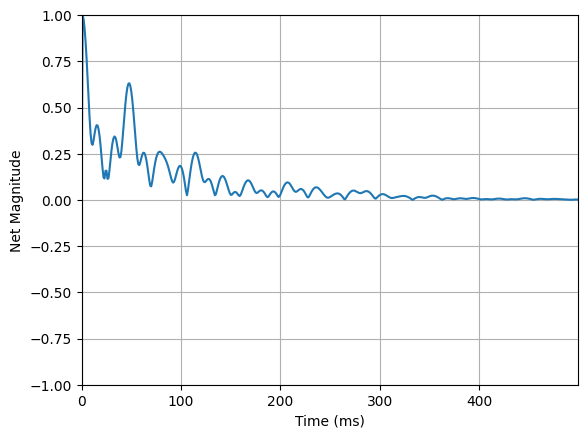

In [ ]:
# Spin-Echo Sequences



df = 10		# Hz off-resonance.
T1 = 600	# ms.
T2 = 100	# ms.
TE = 50		# ms.
TR = 500		# ms.
flip_90 = math.pi/2	# radians.
flip_180 = math.pi	# radians.
dT = 1    # ms.
T = 1000	# total duration
Nf = 5		# Number of frequencies.
df = []
for k in range(0,Nf):
  a = round(random.uniform(-50, 50), 5)
  df.append(a)	# Hz off-resonance.
N1 = round(TE/2/dT)
N2 = round((TR-TE/2)/dT)

Msig = np.zeros((Nf, N1+N2), dtype=complex) # Get the Propagation Matrix

Rflip_90 = yrot(flip_90)
Rflip_180 = xrot(flip_180)
M = np.zeros((3,N1+N2))	 # Keep track of magnetization at all time points.
M[:, [0]] =[[0],[0],[1]] # Starting magnetization

for f in range(0,len(df)):
  A,B = freeprecess(dT,T1,T2,df[f])

  M[:, [1]] = np.array(Rflip_90) @ np.array(M[:, [0]])
  for i in range(2,N1):
    M[:,[i]] = A @ M[:,[i-1]] + B

  M[:, [N1]] = np.array(Rflip_180) @ np.array(M[:, [N1-1]])
  for j in range(1,N2):
    M[:,[j+N1]] = A @ M[:,[j+N1-1]] + B

  Msig[[f],:]=M[[0],:]+1j * M[[1],:]	# Just keep the signal component.

time = np.arange(0,N1+N2)*dT
plt.plot(time,np.abs(np.mean(Msig, axis=0)))
plt.xlabel('Time (ms)')
plt.ylabel('Net Magnitude')
plt.axis([min(time), max(time), -1, 1])
plt.grid(True)
plt.show()

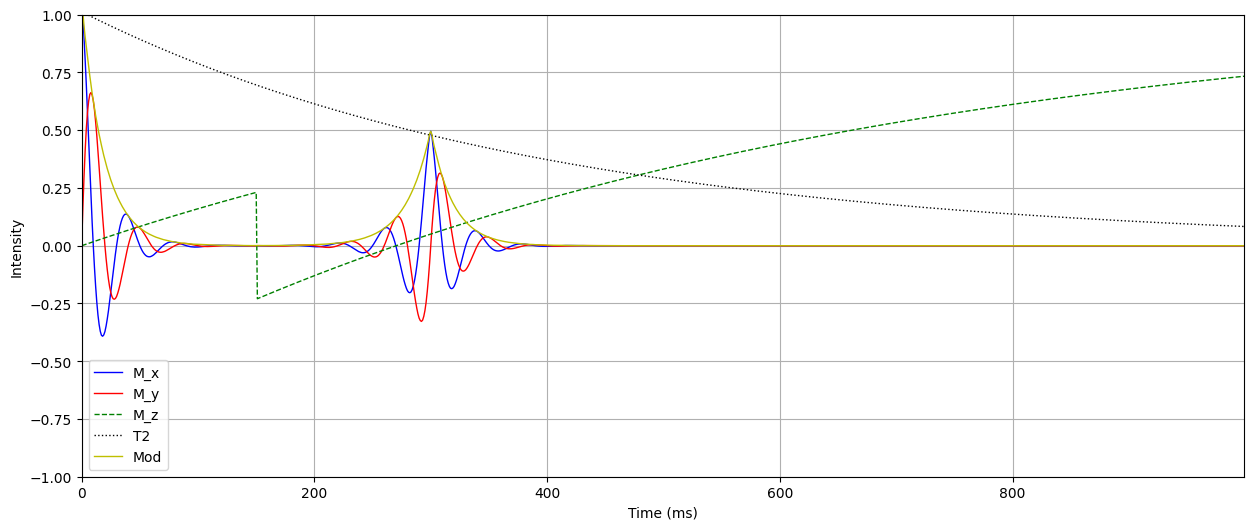

In [ ]:
# Spin-Echo Sequences associado ao artigo: "Simulação de sinais de RMN através das equações de Bloch"

import numpy as np
import matplotlib.pyplot as plt
import math
import random



def zrot(phi):
  Rz = [[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]]
  return Rz

def yrot(phi):
  Ry = [[np.cos(phi), 0, np.sin(phi)],[0, 1, 0],[-np.sin(phi), 0, np.cos(phi)]]
  return Ry

def xrot(phi):
  Rx = [[1, 0, 0], [0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]]
  return Rx

def freeprecess(T,T1,T2,df):
  phi = 2 * math.pi * df * T	# Resonant precession, radians.
  E1 = np.exp(-T/T1)
  E2 = np.exp(-T/T2)

  Afp = np.array([[E2, 0, 0], [0, E2, 0], [0, 0, E1]]) @ zrot(phi)
  Bfp = np.array([[0], [0], [1-E1]])
  return Afp, Bfp




dT = 1 #ms
T = 1000 #ms - Tempo total aquisição FID
Tn1 = 150  #ms - Tempo até primeiro pulso
T1 = 600 #ms
T2 = 400 #ms

N0 = round(T/dT) #nº pontos total;    tempo total = N0*dT
N1 = round(Tn1/dT) #tempo até primeiro pulso
N2 = N0 - N1 # nº pontos depois do ultimo pulso

flip_90 = math.pi/2	# radianos
flip_180 = math.pi	# radianos
Rflip_90 = yrot(flip_90)
Rflip_180 = xrot(flip_180)


T22 = 20 #ms
FWHM = 1/(math.pi*T22) #Hz

# 39*FWHM integra 99,5% da região isocromatas
# 76*FWHM integra 99,9% da região isocromatas
x0 = 25 * 10**-3 #Hz
x01 = x0 - 39*FWHM/2 #Hz
x02 = x0 + 39*FWHM/2 #Hz

Niso = 1000
df = np.linspace(x01,x02,Niso)

M = np.zeros((3,N0))
Ms = np.zeros((3,N0))

M0 =[[0],[0],[1]]

for f in range(0,len(df)):

  A,B = freeprecess(dT,T1,T2,df[f])

  M[:, [0]] = np.array(Rflip_90) @ np.array(M0)
  for i in range(1,N1+1):
    M[:,[i]] = A @ M[:,[i-1]] + B

  M[:, [N1+1]] = np.array(Rflip_180) @ np.array(M[:, [N1-1]])
  for j in range(2,N2):
    M[:,[j+N1]] = A @ M[:,[j+N1-1]] + B

  g = T22 / ((1 + ((df[f] - x0)**2) * (2 * np.pi * T22)**2)) #Pico Lorentziano

  #Somando as componentes x y z das isocromata
  Ms[0, :] = g * M[0, :] + Ms[0, :]
  Ms[1, :] = g * M[1, :] + Ms[1, :]
  Ms[2, :] = g * M[2, :] + Ms[2, :]

time = np.arange(0,N0)*dT
Ms_max = np.max(Ms[:, 1])
Ms = Ms / Ms_max
A = np.sqrt(Ms[0, 1] ** 2 + Ms[1, 1] ** 2)
CurvaT2 = A*np.exp(-time/T2)
CurvaT22 = A*np.exp(-time/T22)

Mod = (Ms[0,:]**2+Ms[1,:]**2)**0.5 #Módulo do Sinal real e imaginário

plt.figure(figsize=(15, 6))
plt.plot(time, Ms[0], 'b-', time, Ms[1], 'r-', time, Ms[2], 'g--', time, CurvaT2, 'k:', time, Mod, 'y-',linewidth=1)
plt.legend(['M_x', 'M_y', 'M_z','T2','Mod'])
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.axis([min(time), max(time), -1, 1])
plt.grid(True)
plt.show()

In [ ]:
def gssignal(flip,T1,T2,TE,TR,dfreq,phi):
  Rflip = yrot(flip)
  Atr,Btr = freeprecess(TR-TE,T1,T2,dfreq)
  Ate,Bte = freeprecess(TE,T1,T2,dfreq)
  Atr = zrot(phi)@Atr

  Mss = np.linalg.inv(np.eye(3)-Ate@Rflip@Atr) @ (Ate@Rflip@Btr+Bte)
  Msig = Mss[1]+ 1j*Mss[2]
  return Msig,Mss

Msig,Mss = gssignal(math.pi/3,600,100,2,10,0,math.pi/2)
Mss

array([[0.12479353],
       [0.11291785],
       [0.19654944]])

In [ ]:
def gresignal(flip,T1,T2,TE,TR,dfreq):
  N = 100
  M = np.zeros((3,N))
  phi = (np.arange(1, N+1)/N - 0.5) * 4*np.pi

  for k in range(0,N):
    _,M1 = gssignal(flip,T1,T2,TE,TR,dfreq,phi[k]);
    M[:,[k]]=M1
  return Msig,M

Msig, M = gresignal(math.pi/3,600,100,2,10,0)
Mss = np.mean(M, axis=1)
Mss

array([1.15741209e-01, 4.44232837e-18, 1.80061825e-01])